#**IndustryLab - Progetto.ipynb**

In [0]:
#Caricamento pacchetto
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from IPython.display import HTML
import io
import base64

In [0]:
#Configurazione del layout
#https://stackoverflow.com/questions/21754976/ipython-notebook-arrange-plots-horizontally 

class FlowLayout(object):
    def __init__(self):
        self.sHtml =  """
        <style>
        .floating-box {
        display: inline-block;
        margin: 10px;
        border: 3px solid #888888;  
        }
        </style>
        """
    def add_plot(self, oAxes):
        Bio=io.BytesIO() 
        fig = oAxes.get_figure()
        fig.canvas.print_png(Bio) 
        sB64Img = base64.b64encode(Bio.getvalue()).decode()
        self.sHtml+= (
            '<div class="floating-box">'+ 
            '<img src="data:image/png;base64,{}\n">'.format(sB64Img)+
            '</div>')
    def PassHtmlToCell(self):
        ''' Final step - display the accumulated HTML '''
        display(HTML(self.sHtml))

oPlot = FlowLayout()

In [0]:
#Caricamento db originale
db = pd.read_csv("/content/Caso2.csv")
db.head(1)

,Banco,CodiceDaLinea,Programma,Data_ora,Data,Ora,Turno,Master,coppia_max_ciclo,picco_coppia_zero,media_coppia_zero,picco_coppia_iniziale,media_coppia_iniziale,velocita_a_regime,picco_pressione_velocita_a_regime,media_pressione_velocita_a_regime,picco_portata_velocita_a_regime,media_portata_velocita_a_regime,velicita_1,picco_pressione_velocita_1,media_pressione_velocita_1,picco_portata_velocita_1,media_portata_velocita_1,velocita_2,picco_pressione_velocita_2,media_pressione_velocita_2,picco_portata_velocita_2,media_portata_velocita_2,picco_coppia_finale,media_coppia_finale,Temperatura,n_esito,esito
0,BancoGP5,010160954163140A00000000000,18_GP5_910_CW.DBF,2016-11-09 15:43:30,09/11/2016,15:43:30,B,,0.0,0.0,0.000917,0.0,0.0,2300.0,12.209582,12.041801,1343.039795,1341.342041,140.0,1.674603,1.643796,51.519997,51.481518,500.0,0.0,0.0,0.0,0.0,0.204679,0.1438,42.196945,100,PEZZO BUONO ...


##**Data Preparation**

In [0]:
print(len(db.columns))
print(db.columns)

33
Index(['Banco', 'CodiceDaLinea', 'Programma', 'Data_ora', 'Data', 'Ora',
       'Turno', 'Master', 'coppia_max_ciclo', 'picco_coppia_zero',
       'media_coppia_zero', 'picco_coppia_iniziale', 'media_coppia_iniziale',
       'velocita_a_regime', 'picco_pressione_velocita_a_regime',
       'media_pressione_velocita_a_regime', 'picco_portata_velocita_a_regime',
       'media_portata_velocita_a_regime', 'velicita_1',
       'picco_pressione_velocita_1', 'media_pressione_velocita_1',
       'picco_portata_velocita_1', 'media_portata_velocita_1', 'velocita_2',
       'picco_pressione_velocita_2', 'media_pressione_velocita_2',
       'picco_portata_velocita_2', 'media_portata_velocita_2',
       'picco_coppia_finale', 'media_coppia_finale', 'Temperatura', 'n_esito',
       'esito'],
      dtype='object')


In [0]:
classes = {}
for i in db.columns:
  classes[i]=len(db[i].unique())

#Useless variables
useless = dict((k, v) for k, v in classes.items() if v == 1)
useless_list = [i for i in useless.keys()]
useless_list

['Banco',
 'Master',
 'picco_coppia_zero',
 'picco_coppia_iniziale',
 'media_coppia_iniziale',
 'velicita_1',
 'picco_pressione_velocita_2',
 'media_pressione_velocita_2',
 'picco_portata_velocita_2',
 'media_portata_velocita_2']

####Rimozione costanti

In [0]:
useful = set([i for i in db.columns]) - set(useless_list) - set(['Data','Ora'])
db_ = db[[i for i in useful]]

In [0]:
#Variabili finali
print("Num. variabili utili: ",len(db_.columns))
db_.columns

Num. variabili utili:  21


Index(['picco_pressione_velocita_1', 'Turno', 'picco_coppia_finale',
       'picco_portata_velocita_1', 'n_esito', 'Temperatura',
       'media_pressione_velocita_1', 'media_coppia_finale', 'Data_ora',
       'media_coppia_zero', 'media_portata_velocita_a_regime', 'velocita_2',
       'picco_pressione_velocita_a_regime', 'media_portata_velocita_1',
       'coppia_max_ciclo', 'velocita_a_regime',
       'picco_portata_velocita_a_regime', 'Programma', 'CodiceDaLinea',
       'esito', 'media_pressione_velocita_a_regime'],
      dtype='object')

In [0]:
#Order by year
db_['Data_ora'] = pd.to_datetime(db_['Data_ora'])
db_ord = db.sort_values(by='Data_ora')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


####Rimozione `velocita_2`

In [0]:
#Binario

#Useless variables
binary = dict((k, v) for k, v in classes.items() if v == 2)
binary = [i for i in binary.keys()]
binary

['velocita_2']

In [0]:
db_.velocita_2.unique()

array([500., 100.])

In [0]:
print(dict(Counter(db_.velocita_2)))

{500.0: 296598, 100.0: 7}


In [0]:
#Rimozione velocita_2
db_.drop(['velocita_2'], axis='columns', inplace=True)

La variabile 'velocita_2' ha praticamente solo valori pari a 500.

In [0]:
#Esporta csv
#db.to_csv("/content/DbRidotto1.csv")

In [5]:
#Caricamento db ridotto
db = pd.read_csv("/content/DbRidotto.csv")
db.drop(['Unnamed: 0'], axis='columns', inplace=True)
db.head(1)

,picco_pressione_velocita_1,Turno,picco_coppia_finale,picco_portata_velocita_1,Temperatura,media_pressione_velocita_1,media_coppia_finale,Data_ora,media_coppia_zero,media_portata_velocita_a_regime,picco_pressione_velocita_a_regime,media_portata_velocita_1,coppia_max_ciclo,velocita_a_regime,picco_portata_velocita_a_regime,Programma,esito,media_pressione_velocita_a_regime
0,1.674603,B,0.204679,51.519997,42.196945,1.643796,0.1438,2016-11-09 15:43:30,0.000917,1341.342041,12.209582,51.481518,0.0,2300.0,1343.039795,18_GP5_910_CW.DBF,PEZZO BUONO ...,12.041801


##**Analisi preliminari**

###**Variabili categoriche**

In [0]:
#Numero di classi
print("Turno: ",len(db_.Turno.unique()))
print("Programma",len(db_.Programma.unique()))
print("CodiceDaLinea",len(db_.CodiceDaLinea.unique()))
print("Esito",len(db_.esito.unique()))

Turno:  9
Programma 18
CodiceDaLinea 294489
Esito 25


####Rimozione `CodiceDaLinea`

In [0]:
#Rimozione CodiceDaLinea
db_.drop(['CodiceDaLinea'], axis='columns', inplace=True)

####Analisi `Turno`

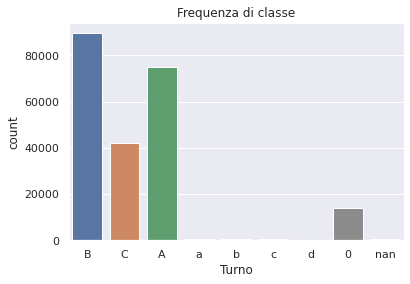

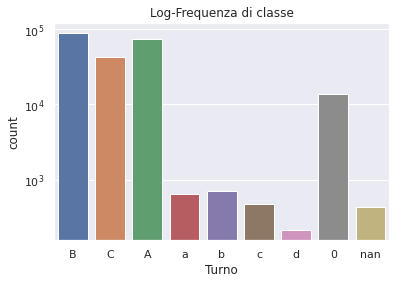

In [85]:
##Analisi Turno

#Elaborazione per plot
dbp = db
dbp.Turno = dbp.Turno.apply(str)
#dbp.Turno = dbp.Turno.replace("nan", np.nan)

plt.subplot(111)
ax1 = sns.countplot(x="Turno", data=dbp)
plt.title("Frequenza di classe")
plt.show()

plt.subplot(111)
ax = sns.countplot(x="Turno", data=dbp)
ax.set_yscale('log')
plt.title("Log-Frequenza di classe"
plt.show()

In [105]:
#Mostra il nome e la frequenza di ogni turno
P = pd.DataFrame.from_dict(dict(Counter(db.Turno)),orient='index').reset_index()
P.columns = ['K','V']
P.reset_index()
P_ = P.sort_values('V',ascending=False)
P_ = P_.reset_index()
P_.columns = ['Fattore','Nome','Frequenza']
#Aggiung freq relativa
P_['%'] = P_.Frequenza/len(db)
P_ = P_[['Nome','Frequenza','%']]
P_

,Nome,Frequenza,%
0,B,89631,0.401436
1,A,74958,0.335719
2,C,42214,0.189066
3,0,13992,0.062667
4,b,711,0.003184
5,a,647,0.002898
6,c,474,0.002123
7,NaN,436,0.001953
8,d,213,0.000954


####Analisi `Programma`

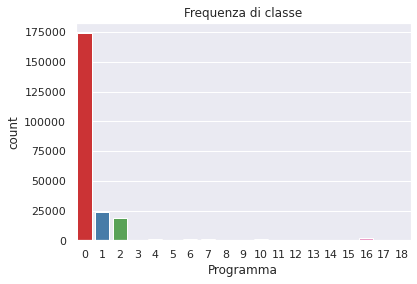

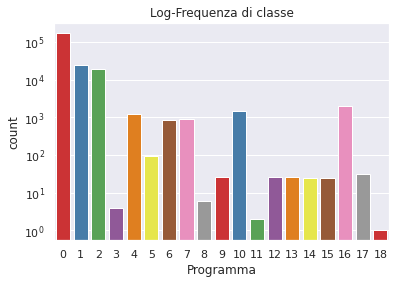

In [91]:
#Analisi Programma

#Elaborazione per plot
dbp = db
dbp.Programma = dbp.Programma.apply(str)
dbp.Programma = pd.factorize(dbp.Programma)[0]

sns.set(style="darkgrid")
plt.subplot(111)
ax1 = sns.countplot(x="Programma", data=dbp, palette="Set1")
plt.title("Frequenza di classe")
plt.show()

plt.subplot(111)
ax = sns.countplot(x="Programma", data=dbp, palette="Set1")
ax.set_yscale('log')
plt.title("Log-Frequenza di classe")
plt.show()

In [100]:
#Mostra il nome e la frequenza di ogni programma
P = pd.DataFrame.from_dict(dict(Counter(db.Programma)),orient='index').reset_index()
P.columns = ['K','V']
P.reset_index()
P_ = P.sort_values('V',ascending=False)
P_ = P_.reset_index()
P_.columns = ['Fattore','Nome','Frequenza']
#Aggiung freq relativa
P_['%'] = P_.Frequenza/len(db)
P_

,Fattore,Nome,Frequenza,%
0,0,18_GP5_910_CW.DBF,173972,0.779179
1,1,17_GP5_430_CCW.DBF,23641,0.105882
2,2,12_GP5_430B_D1.DBF,18932,0.084792
3,16,15_GP5_340_CCW.DBF,2029,0.009087
4,10,14_GP5_340_D1.DBF,1504,0.006736
5,4,13_GP5_500_CW.DBF,1234,0.005527
6,7,16_GP5_500_CCW.DBF,876,0.003923
7,6,05_GP5_340_S1.DBF,821,0.003677
8,5,058_GP5_CAMERARIDOTTA.DBF,95,0.000425
9,17,19_GP5S-CAMRID_CW.DBF,31,0.000139


####Analisi `esito`

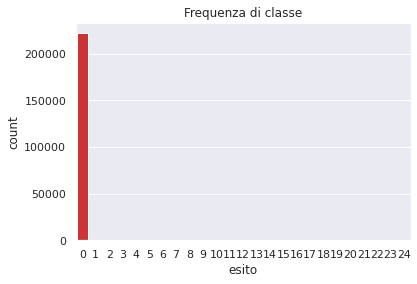

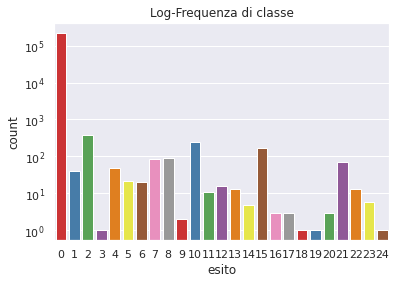

In [95]:
#Analisi Esito

#Elaborazione per plot
dbp.esito = dbp.esito.apply(str)
l1 = pd.Series(pd.factorize(dbp.esito)[1])
l2 = pd.Series(db.esito.unique())
dbp.esito = pd.factorize(dbp.esito)[0]

plt.subplot(111)
ax1 = sns.countplot(x="esito", data=dbp, palette="Set1")
plt.title("Frequenza di classe")
plt.show()

plt.subplot(111)
ax = sns.countplot(x="esito", data=dbp, palette="Set1")
ax.set_yscale('log')
plt.title("Log-Frequenza di classe")
plt.show()

In [101]:
#Mostra il nome e la frequenza di ogni esito
P = pd.DataFrame.from_dict(dict(Counter(db.esito)),orient='index').reset_index()
P.columns = ['K','V']
P.reset_index()
P_ = P.sort_values('V',ascending=False)
P_ = P_.reset_index()
P_.columns = ['Fattore','Nome','Frequenza']
#Aggiungi frequenza relativa
P_['%'] = P_.Frequenza/len(db)
P_

,Fattore,Nome,Frequenza,%
0,0,PEZZO BUONO ...,222031,0.994424
1,2,SCARTO PICCO COPPIA MAX FASE PULIZIA INIZIALE ...,373,0.001671
2,10,SCARTO PORTATA CONTROLLO VELOCITA'1 MIN MEDIA ...,241,0.001079
3,15,SCARTO COPPIA FINALE MAX MEDIA ...,171,0.000766
4,8,SCARTO PORTATA VELOCITA' A REGIME MAX PICCO ...,92,0.000412
5,7,SCARTO PRESSIONE CONTROLLO VELOCITA'1 MIN MEDI...,87,0.000390
6,21,SCARTO COPPIA MAX CICLO ...,71,0.000318
7,4,SCARTO PORTATA VELOCITA' A REGIME MIN MEDIA ...,48,0.000215
8,1,ANOMALIA AGGANCIO ...,40,0.000179
9,5,SCARTO PRESSIONE VELOCITA' A REGIME MAX PICCO ...,22,0.000099


####Rimozione `n_esito`
`n_esito` è la versione numerica di `esito

In [0]:
db.drop(['n_esito'], axis='columns', inplace=True)

###**Variabili numeriche**

In [0]:
categ = ['Turno','Programma','esito','Data_ora']
db_num = db.drop([i for i in categ], axis='columns')

In [6]:
db_num.head(1)

,picco_pressione_velocita_1,picco_coppia_finale,picco_portata_velocita_1,Temperatura,media_pressione_velocita_1,media_coppia_finale,media_coppia_zero,media_portata_velocita_a_regime,picco_pressione_velocita_a_regime,media_portata_velocita_1,coppia_max_ciclo,velocita_a_regime,picco_portata_velocita_a_regime,media_pressione_velocita_a_regime
0,1.674603,0.204679,51.519997,42.196945,1.643796,0.1438,0.000917,1341.342041,12.209582,51.481518,0.0,2300.0,1343.039795,12.041801


####**Descrittori della pressione**

Correlazione e poi, in base alle variabili più correlate boxplot per le classi come [qui](https://seaborn.pydata.org/generated/seaborn.violinplot.html) e anche con le categoriche:
- esito
- turno

In [0]:
#Selezione delle variabili che riguardano la pressione
press = ['picco_pressione_velocita_1','media_pressione_velocita_1','picco_pressione_velocita_a_regime',
         'media_pressione_velocita_a_regime']        


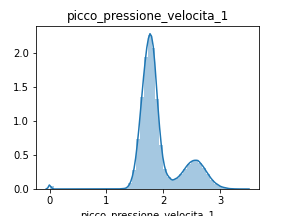
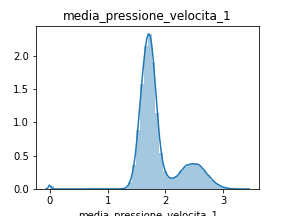
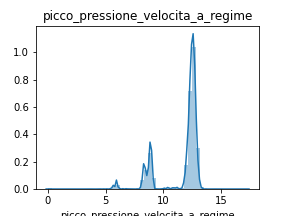
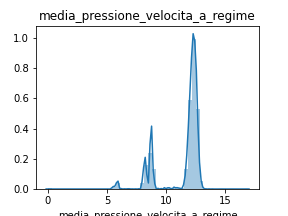

In [8]:
#Distribuzione

for i in press: 
    fig, ax = plt.subplots(1, 1, figsize=(4,3))                      
    sns.distplot(db[i])
    plt.title(str(i)) 
    oPlot.add_plot(ax) 
    plt.close() 
oPlot.PassHtmlToCell()

AttributeError: ignored

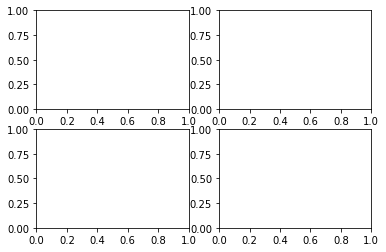

In [16]:
#Violiplot
def plotter(g,nrows=2,ncols=2):
  fig, axs = plt.subplots(nrows, ncols)
  k=0
  for i in press:
    axs[k].plot(g(db[i]))
    k=k+1

plotter(g=sns.distplot)

Valori mancanti

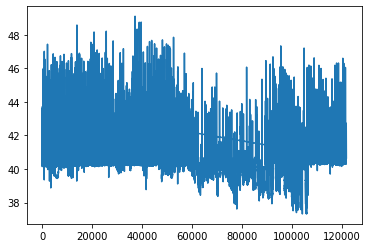

In [0]:
import matplotlib.pyplot as plt
db_ = db_ord[['Data_ora','Temperatura']]
line_chart = plt.plot(db_['Temperatura'])
#plt.title()
plt.show()